# 异常值检测

# 1.isolation forest

## 1.1测试样本

In [36]:
import pandas as pd
X_train_demo = pd.read_pickle('test.pkl')

测试样例示例：

In [37]:
X_train_demo.head()

,x,y
0,-2.240551,-2.211728
1,-1.662269,-1.795284
2,-1.659481,-1.585447
3,-1.656292,-1.597164
4,-1.641141,-1.824533


## 1.1demo

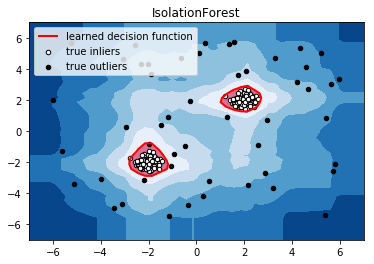

In [38]:
# 参考https://blog.csdn.net/ye1215172385/article/details/79762317 
# 官方例子https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
 
rng = np.random.RandomState(42)
 
# 构造训练样本
n_samples = 200  #样本总数
outliers_fraction = 0.25  #异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
 
X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]   #正常样本
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本
 
# 构造模型并拟合
clf = IsolationForest(max_samples=n_samples, random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# 计算得分并设置阈值
scores_pred = clf.decision_function(X_train)
threshold = np.percentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
plt.show()


## 1.2自己修改的，X_train能够改成自己需要的数据

此处没有进行标准化，可以先进行标准化再在标准化的基础上去除异常点，
from sklearn.preprocessing import StandardScaler

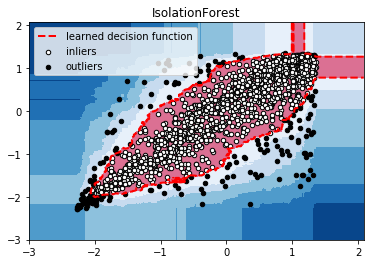

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from scipy import stats
 
rng = np.random.RandomState(42)

    
X_train =  X_train_demo.values
outliers_fraction = 0.1
n_samples = 500
# 构造模型并拟合
clf = IsolationForest(max_samples=n_samples, random_state=rng, contamination=outliers_fraction)
clf.fit(X_train)
# 计算得分并设置阈值
scores_pred = clf.decision_function(X_train)
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图
 
# plot the line, the samples, and the nearest vectors to the plane
range_max_min0 = (X_train[:,0].max()-X_train[:,0].min())*0.2
range_max_min1 = (X_train[:,1].max()-X_train[:,1].min())*0.2
xx, yy = np.meshgrid(np.linspace(X_train[:,0].min()-range_max_min0, X_train[:,0].max()+range_max_min0, 500),
                     np.linspace(X_train[:,1].min()-range_max_min1, X_train[:,1].max()+range_max_min1, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("IsolationForest")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  #绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  #绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  #绘制正常点区域，值从阈值到最大的那部分
 

is_in = clf.predict(X_train)>0
b = plt.scatter(X_train[is_in, 0], X_train[is_in, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[~is_in, 0], X_train[~is_in, 1], c='black',
                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((X_train[:,0].min()-range_max_min0, X_train[:,0].max()+range_max_min0,))
plt.ylim((X_train[:,1].min()-range_max_min1, X_train[:,1].max()+range_max_min1,))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'inliers', 'outliers'],
           loc="upper left")
plt.show()


## 1.3核心代码

### 1.3.1示例样本

In [40]:
import numpy as np
# 构造训练样本
n_samples = 200  #样本总数
outliers_fraction = 0.25  #异常样本比例
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
 
X = 0.3 * rng.randn(n_inliers // 2, 2)
X_train = np.r_[X + 2, X - 2]   #正常样本
X_train = np.r_[X_train, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]  #正常样本加上异常样本

### 1.3.2核心代码实现

In [41]:
from sklearn.ensemble import IsolationForest
# fit the model
# max_samples 构造一棵树使用的样本数，输入大于1的整数则使用该数字作为构造的最大样本数目，
# 如果数字属于(0,1]则使用该比例的数字作为构造iforest
# outliers_fraction 多少比例的样本可以作为异常值
clf = IsolationForest(max_samples=0.8, contamination=0.25)
clf.fit(X_train)
# y_pred_train = clf.predict(X_train)
scores_pred = clf.decision_function(X_train)
threshold = np.percentile(scores_pred, 100 * outliers_fraction)  #根据训练样本中异常样本比例，得到阈值，用于绘图

## 以下两种方法的筛选结果，完全相同
X_train_predict1 = X_train[clf.predict(X_train)==1]
X_train_predict2 = X_train[scores_pred>=threshold,:]

In [42]:
# 其中，1的表示非异常点，-1的表示为异常点
clf.predict(X_train)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# 2 DBSCAN

# 2.1 demo

[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0  1  2  3  4] 聚类簇的个数为： 5
[-1  0] 聚类簇的个数为： 1
[-1  0  1] 聚类簇的个数为： 2
[-1  0  1  2  3] 聚类簇的个数为： 4


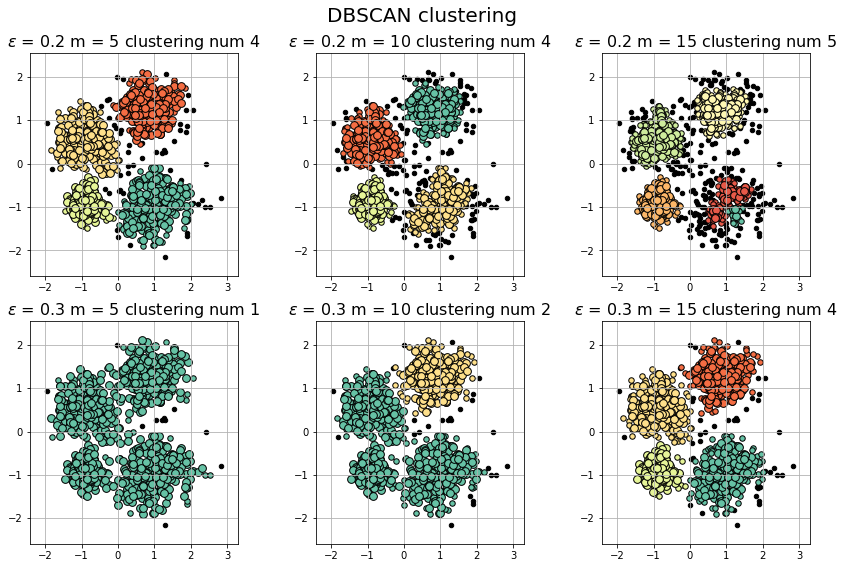

In [43]:
#
# 参考https://blog.csdn.net/hb707934728/article/details/71515160
#
# 官方示例 https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

import sklearn.datasets as ds
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
 
 
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d
 
 
if __name__ == "__main__":
    N = 1000
    centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
    #scikit中的make_blobs方法常被用来生成聚类算法的测试数据，直观地说，make_blobs会根据用户指定的特征数量、
    # 中心点数量、范围等来生成几类数据，这些数据可用于测试聚类算法的效果。
    #函数原型：sklearn.datasets.make_blobs(n_samples=100, n_features=2,
    # centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)[source]
    #参数解析：
    # n_samples是待生成的样本的总数。
    #
    # n_features是每个样本的特征数。
    #
    # centers表示类别数。
    #
    # cluster_std表示每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0, 3.0]。
    data, y = ds.make_blobs(N, n_features=2, centers=centers, cluster_std=[0.5, 0.25, 0.7, 0.5], random_state=0)
    data = StandardScaler().fit_transform(data)
    # 数据1的参数：(epsilon, min_sample)
    params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))
 
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN clustering', fontsize=20)
 
    for i in range(6):
        eps, min_samples = params[i]
        #参数含义：
        #eps:半径，表示以给定点P为中心的圆形邻域的范围
        #min_samples:以点P为中心的邻域内最少点的数量
        #如果满足,以点P为中心,半径为EPS的邻域内点的个数不少于MinPts,则称点P为核心点
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y_hat = model.labels_
 
        core_indices = np.zeros_like(y_hat, dtype=bool)  # 生成数据类型和数据shape和指定array一致的变量
        core_indices[model.core_sample_indices_] = True  # model.core_sample_indices_ border point位于y_hat中的下标
         
        # 统计总共有积累，其中为-1的为未分类样本
        y_unique = np.unique(y_hat)
        n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
        print (y_unique, '聚类簇的个数为：', n_clusters)
 
        plt.subplot(2, 3, i+1) # 对第几个图绘制，2行3列，绘制第i+1个图
        # plt.cm.spectral https://blog.csdn.net/robin_Xu_shuai/article/details/79178857
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size)) #用于给画图灰色
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            if k == -1:
                # 用于绘制未分类样本
                plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
                continue
            # 绘制正常节点
            plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
            # 绘制边缘点
            plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title(u'$\epsilon$ = %.1f m = %d clustering num %d'%(eps, min_samples, n_clusters), fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

## 2.1 使用测试样本

[-1  0  1  2  3] 聚类簇的个数为： 4
[-1  0] 聚类簇的个数为： 1
[-1  0] 聚类簇的个数为： 1
[-1  0] 聚类簇的个数为： 1
[-1  0] 聚类簇的个数为： 1
[-1  0] 聚类簇的个数为： 1


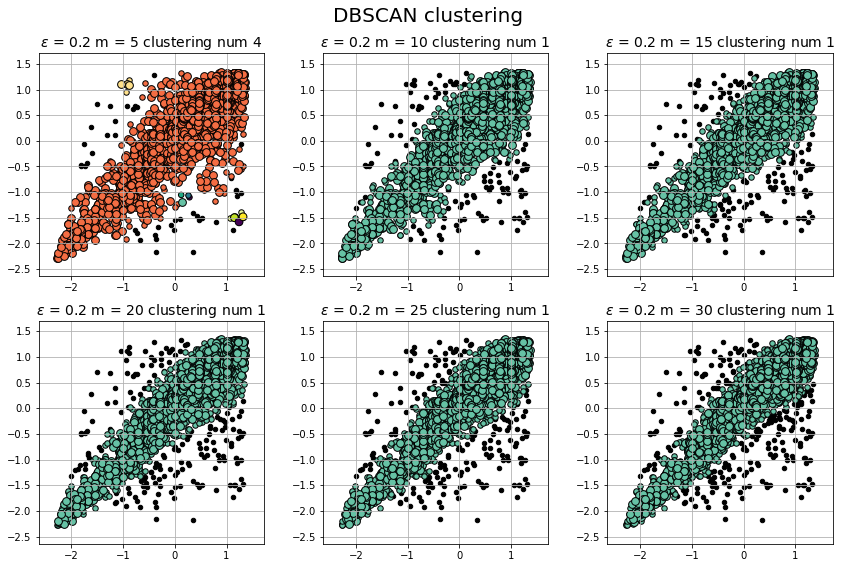

In [44]:
#
# 参考https://blog.csdn.net/hb707934728/article/details/71515160
#
# 官方示例 https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

import sklearn.datasets as ds
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
 
 
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d
 
 
if __name__ == "__main__":
    N = 1000
    data = X_train_demo.values
    # 数据1的参数：(epsilon, min_sample)
    params = ((0.2, 5), (0.2, 10), (0.2, 15), (0.2, 20), (0.2, 25), (0.2, 30))
 
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN clustering', fontsize=20)
 
    for i in range(6):
        eps, min_samples = params[i]
        #参数含义：
        #eps:半径，表示以给定点P为中心的圆形邻域的范围
        #min_samples:以点P为中心的邻域内最少点的数量
        #如果满足,以点P为中心,半径为EPS的邻域内点的个数不少于MinPts,则称点P为核心点
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y_hat = model.labels_
 
        core_indices = np.zeros_like(y_hat, dtype=bool)  # 生成数据类型和数据shape和指定array一致的变量
        core_indices[model.core_sample_indices_] = True  # model.core_sample_indices_ border point位于y_hat中的下标
         
        # 统计总共有积累，其中为-1的为未分类样本
        y_unique = np.unique(y_hat)
        n_clusters = y_unique.size - (1 if -1 in y_hat else 0)
        print (y_unique, '聚类簇的个数为：', n_clusters)
 
        plt.subplot(2, 3, i+1) # 对第几个图绘制，2行3列，绘制第i+1个图
        # plt.cm.spectral https://blog.csdn.net/robin_Xu_shuai/article/details/79178857
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size)) #用于给画图灰色
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            if k == -1:
                # 用于绘制未分类样本
                plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
                continue
            # 绘制正常节点
            plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
            # 绘制边缘点
            plt.scatter(data[cur & core_indices][:, 0], data[cur & core_indices][:, 1], s=60, c=clr, marker='o', edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title(u'$\epsilon$ = %.1f m = %d clustering num %d'%(eps, min_samples, n_clusters), fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

## 2.2核心代码

In [45]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
data = X_train_demo.values
eps, min_samples = 0.2, 10
# eps为领域的大小，min_samples为领域内最小点的个数
model = DBSCAN(eps=eps, min_samples=min_samples) # 构造分类器
model.fit(data) # 拟合
labels = model.labels_ # 获取类别标签，-1表示未分类
# 获取其中的core points
core_indices = np.zeros_like(labels, dtype=bool)  # 生成数据类型和数据shape和指定array一致的变量
core_indices[model.core_sample_indices_] = True  # model.core_sample_indices_ border point位于labels中的下标
core_point = data[core_indices]
# 获取非异常点
normal_point = data[labels>=0]

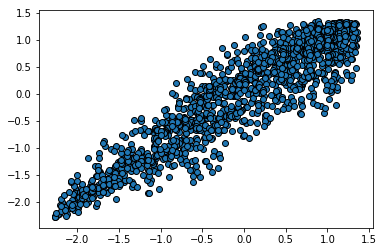

In [46]:
# 绘制剔除了异常值后的图
plt.scatter(normal_point[:,0],normal_point[:,1],edgecolors='k')
plt.show()

## 2.3构造函数

该函数先进行了标准化，方便使用固定的参数进行分析

In [47]:
def filter_data(data0, params):
    from sklearn.cluster import DBSCAN
    from sklearn import metrics
    scaler = StandardScaler()
    scaler.fit(data0)
    data = scaler.transform(data0)
    
    eps, min_samples = params
    # eps为领域的大小，min_samples为领域内最小点的个数
    model = DBSCAN(eps=eps, min_samples=min_samples) # 构造分类器
    model.fit(data) # 拟合
    labels = model.labels_ # 获取类别标签，-1表示未分类
    # 获取其中的core points
    core_indices = np.zeros_like(labels, dtype=bool)  # 生成数据类型和数据shape和指定array一致的变量
    core_indices[model.core_sample_indices_] = True  # model.core_sample_indices_ border point位于labels中的下标
    core_point = data[core_indices]
    # 获取非异常点
    normal_point = data0[labels>=0]
    return normal_point

## 2.3 衡量分类效果

### 轮廓系数
wiki：参考https://en.wikipedia.org/wiki/Silhouette_(clustering)

${\displaystyle a(i)={\frac {1}{|C_{i}|-1}}\sum _{j\in C_{i},i\neq j}d(i,j)}$，样本点i（向量）在簇内与其它所有样本点j(向量)的平均距离

${\displaystyle b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}, i\in C_{i}}d(i,j)}$,样本点i与其它簇的距离，定义为i与其它簇各个点的平均距离，取其中的最小值为b(i)

${\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}}$ if ${\displaystyle |C_{i}|>1}$,越大越好

${\displaystyle s(i)=0}$ if ${\displaystyle |C_{i}|=1}$

In [48]:
metrics.silhouette_score(data, labels, metric='euclidean')

0.13250260550638607

### Calinski-Harabaz Index 系数

In [49]:
metrics.calinski_harabaz_score(data, labels,)

16.414158842632794

# 3 OneClassSVM

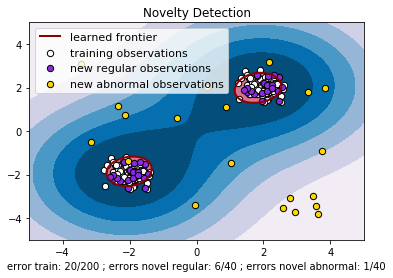

In [50]:
# reference:https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

## 3.1核心代码

In [51]:
X_train = X_train_demo.values
# 构造分类器
clf = svm.OneClassSVM(nu=0.2, kernel="rbf", gamma=0.2)
clf.fit(X_train)
# 预测，结果为-1或者1
labels = clf.predict(X_train)
# 分类分数
score = clf.decision_function(X_train) # 获取置信度
# 获取正常点
X_train_normal = X_train[labels>0]

进行剔除异常点之前

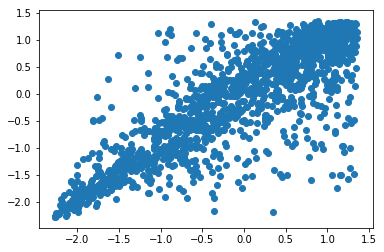

In [52]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

剔除异常点之后

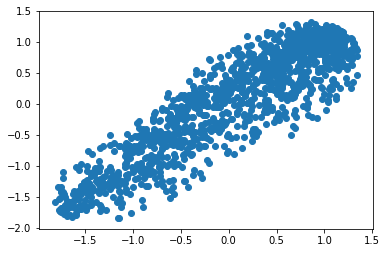

In [53]:
plt.scatter(X_train_normal[:,0],X_train_normal[:,1])
plt.show()

# 4 Local Outlier Factor（LOF）

LOF通过计算一个数值score来反映一个样本的异常程度。
这个数值的大致意思是：

**一个样本点周围的样本点所处位置的平均密度比上该样本点所在位置的密度。比值越大于1，则该点所在位置的密度越小于其周围样本所在位置的密度**，


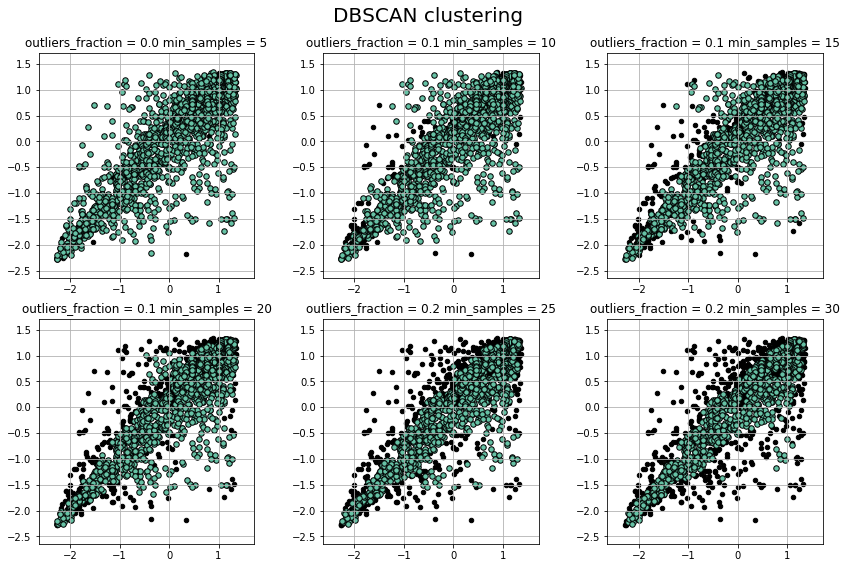

In [54]:
#
# 参考https://blog.csdn.net/hb707934728/article/details/71515160
#
# 官方示例 https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.neighbors import LocalOutlierFactor
 
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d
 
 
if __name__ == "__main__":
    N = 1000
    data = X_train_demo.values
    # 数据1的参数：(epsilon, min_sample)
    params = ((0.01, 5), (0.05, 10), (0.1, 15), (0.15, 20), (0.2, 25), (0.25, 30))
 
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'DBSCAN clustering', fontsize=20)
 
    for i in range(6):
        outliers_fraction, min_samples = params[i]
        #参数含义：
        #eps:半径，表示以给定点P为中心的圆形邻域的范围
        #min_samples:以点P为中心的邻域内最少点的数量
        #如果满足,以点P为中心,半径为EPS的邻域内点的个数不少于MinPts,则称点P为核心点
        
        model = LocalOutlierFactor(n_neighbors=min_samples, contamination=outliers_fraction)
        y_hat = model.fit_predict(X_train)
 
        # 统计总共有积累，其中为-1的为未分类样本
        y_unique = np.unique(y_hat)
 
        # clrs = []
        # for c in np.linspace(16711680, 255, y_unique.size):
        #     clrs.append('#%06x' % c)
        plt.subplot(2, 3, i+1) # 对第几个图绘制，2行3列，绘制第i+1个图
        # plt.cm.spectral https://blog.csdn.net/robin_Xu_shuai/article/details/79178857
        clrs = plt.cm.Spectral(np.linspace(0, 0.8, y_unique.size)) #用于给画图灰色
        for k, clr in zip(y_unique, clrs):
            cur = (y_hat == k)
            if k == -1:
                # 用于绘制未分类样本
                plt.scatter(data[cur, 0], data[cur, 1], s=20, c='k')
                continue
            # 绘制正常节点
            plt.scatter(data[cur, 0], data[cur, 1], s=30, c=clr, edgecolors='k')
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x2_min = np.min(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title(u'outliers_fraction = %.1f min_samples = %d'%(outliers_fraction, min_samples), fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# 4.1 核心代码

In [55]:
from sklearn.neighbors import LocalOutlierFactor
X_train = X_train_demo.values
# 构造分类器
## 25个样本点为一组，异常值点比例为0.2
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.2)
# 预测，结果为-1或者1
labels = clf.fit_predict(X_train)
# 获取正常点
X_train_normal = X_train[labels>0]

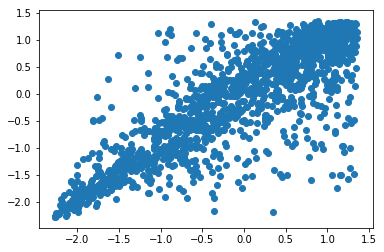

In [56]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

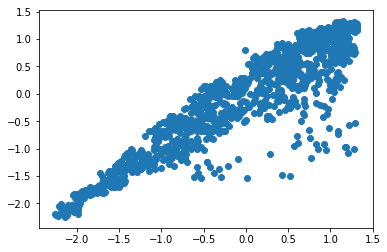

In [57]:
plt.scatter(X_train_normal[:,0],X_train_normal[:,1])
plt.show()